## Setup PyDrake using underactuated in Google Colab

In [1]:
import sys
import importlib
from urllib.request import urlretrieve

IS_COLAB = 'google.colab' in sys.modules

if IS_COLAB and importlib.util.find_spec('pydrake') is None:
  !curl -s https://raw.githubusercontent.com/RussTedrake/underactuated/master/scripts/setup/jupyter_setup.py > jupyter_setup.py
  from jupyter_setup import setup_underactuated
  setup_underactuated()

# Setup utils.py file path
if IS_COLAB:
  # Check if this cell has already been run:
  if not os.path.isdir('DrakeTests/simplePendulum/'):
    !git clone https://github.com/vyas-shubham/DrakeTests.git
    from simplePendulum.pendulumUtils import *
else:
    from pendulumUtils import *

In [2]:
testPrint("Hello")

Hello


## Import Libraries

In [3]:
# Imports
import os
import math
import numpy as np

import matplotlib.pyplot as plt
# from underactuated.jupyter import SetupMatplotlibBackend
# plt_is_interactive = SetupMatplotlibBackend()

from underactuated.pendulum import PendulumVisualizer

## Setup Pendulum Plant and Swing-up using Trajectory Optimisation

[1.0, 0.5, 0.1, 9.81]
[0.57288, 0.5, 0.15, 9.81]


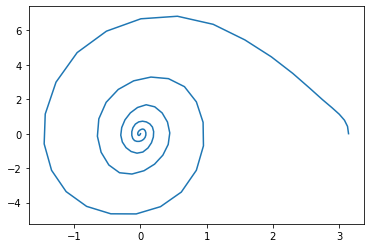

In [4]:
mass = 0.5
damping = 0.15
max_torque = 2.0

result, x_trajectory, torque_trajectory = runPendulumSimulation(mass, damping, max_torque)
assert result.is_success()

fig, ax = plt.subplots()

x_knots = np.hstack([
    x_trajectory.value(t) for t in np.linspace(x_trajectory.start_time(),
                                               x_trajectory.end_time(), 100)
])

ax.plot(x_knots[0, :], x_knots[1, :]);

In [5]:
from IPython.display import HTML

# Animate the result.
vis = PendulumVisualizer(show=False)
ani = vis.animate(x_trajectory)
HTML(ani.to_jshtml())  # Comment this line if saving .mp4 file

## Extract Trajectory

In [6]:
time_trajectory, angle, angle_velocity = extractTrajectory(x_trajectory, torque_trajectory)

Time Array Shape: (1, 4853)
Theta&ThetaDot Array Shape: (2, 4853)
Theta Array Shape: (1, 4853)
Control Torque Array Shape: (1, 4853)


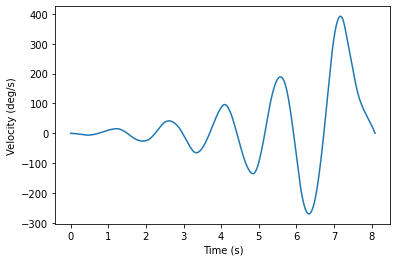

In [9]:
# Plot
plt.plot(time_trajectory[0, :], np.rad2deg(angle_velocity[0,:]))
xlabel = plt.xlabel("Time (s)")
ylabel = plt.ylabel("Velocity (deg/s)")

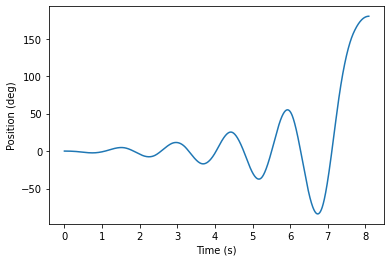

In [10]:
# Plot
plt.plot(time_trajectory[0, :], np.rad2deg(angle[0,:]))
xlabel = plt.xlabel("Time (s)")
ylabel = plt.ylabel("Position (deg)")